In [137]:
from dateutil.parser import parse
from pprint import pprint
import datetime
import matplotlib.pyplot as plt
from copy import deepcopy

def parse_workout_from_list(wk_list):
    wk_dict = {}
    for i, wk in enumerate(wk_list):
        if ':' in wk:
            exercise_name = wk.split(':')[0].lower().replace('    ','')
            try:
                wk_dict[exercise_name] = eval(wk_list[i+1])
            except:
                wk_dict[exercise_name] = eval(wk_list[i+1].replace('+',''))
            if i < len(wk_list)-2 and ':' not in wk_list[i+2]:
                wk_dict[exercise_name].append(eval(wk_list[i+1]))
    return wk_dict

def parse_workout_file(wk_file):
    with open(wk_file, 'r', encoding='utf8') as file:
        data = file.readlines()

    data = [line.replace('\n','').replace('        ','').replace('                ','') for line in data]
    data[0] = data[0].replace('\ufeff','')

    workouts = []
    workout = []
    for i,line in enumerate(data):
        if line == '':
            if data[i-1] == '':
                continue
            workouts.append(workout)
            workout = []
        else:
            workout.append(line)

    for i,workout in enumerate(workouts):
        workouts[i] = {
            "date": workout[0],
            "workout": parse_workout_from_list(workout[2:-1]),
            "sda": workout[-1].split(':')[1].replace(" ",'')
        }
    return workouts

# workouts = parse_workout_file('workout_small.txt')
workouts = parse_workout_file('workout_full.txt')
pprint(workouts[79])
print(len(workouts))
# print(workouts[78]['workout']['swiss_ball_leg_curl--squat_jumps'][:-1])

{'date': '7/1/2019',
 'sda': '3',
 'workout': {'abs_crunches': [(100, 0)],
             'bench_dips--dumbbell_curls': [(20, 165),
                                            (20, 165),
                                            (20, 210),
                                            (20, 210),
                                            [(20, 165),
                                             (20, 165),
                                             (20, 210),
                                             (20, 210)]],
             'leg_raises': [(50, 0)],
             'overhead_cable_tricep_press--bicep_hammer_curls': [(15, 90),
                                                                 (12, 90),
                                                                 (11, 90),
                                                                 (11, 90),
                                                                 (10, 90),
                                                                 [

In [133]:
def join_exercise_diff_weight_type(workouts):
    """
    If same general exercise is performed with different resistance, 
    adjust for weight and combine into same category of exercise.
    For example, bench press with dumbbell (6, 90) would become (6, 180)
    """
    for i,workout in enumerate(workouts):
        new_workout = deepcopy(workout)
        for ex_name, reps in workout['workout'].items():
            if "dumbbell" in ex_name:
                del new_workout['workout'][ex_name]
                new_workout['workout'][ex_name.replace('dumbbell_','')] = [ (ex_set[0],ex_set[1]*2) for ex_set in reps]
        workouts[i] = new_workout
    return workouts

def join_exercise_diff_grip_stance():
    """
    Combine exercises with different grip or stance into the same one.
    For example: leg_press_wide/leg_press_narrow --> leg_press
    """
    pass


def break_up_supersets(workouts):
    """
    Breaking up super-setted exercise into two sequentially performed 
    exercise
    """
    for i,workout in enumerate(workouts):
        new_workout = deepcopy(workout)
        for ex_name, reps in workout['workout'].items():
            if "--" in ex_name:
                del new_workout['workout'][ex_name]
                new_workout['workout'][ex_name.split('--')[0]] = reps[:-1]
                new_workout['workout'][ex_name.split('--')[1]] = reps[-1]
        workouts[i] = new_workout
    return workouts

workouts_1 = break_up_supersets(workouts)
workouts_2 = join_exercise_diff_weight_type(workouts_1)
pprint(workouts_2[4])

{'date': '3/8/2019',
 'sda': '2',
 'workout': {'assisted_front_lever_raise': [(6, -50), (5, -50)],
             'bench_press': [(9, 185), (8, 185), (9, 175), (9, 135)],
             'dips': [(8, 209), (6, 209), (5, 209)],
             'incline_hex_press': [(6, 140), (6, 140), (4, 140)],
             'wide_grip_pull_up': [(6, 209),
                                   (4, 209),
                                   (4, 209),
                                   (2, 189),
                                   (4, 169)]}}


In [109]:
chest_exercise = set(['cable_flies', 'bench', 'incline_bench', 'cable_flys', 'vary_grip_bench', 'incline_close_grip_bench', 'incline_dumbell_flies', 'machine_flies', 'downward_flies', 'incline_chest_press_machine', 'dumbell_flies', 'incline_smith_wide_grip_bench', 'reverse_cable_flies', 'dumbbell_bench_presses', 'incline_bench_press', 'decline_bench', 'dumbell_bench', 'bench_press', 'dumbell_bench_press_rotate_out', 'incline_dumbell_bench', 'incline_flies'])
back_exercise = set(['barbell_row', 'behind_the_back_plate_raise', 'cable_cross_over_upper_back_pull', 'narrow_grip_pull_up', 'upper_back _cable_face_pull', 'wide_grip_pull_up', 'incline_dumbbell_rows','single_arm_reverse_grip_cable_pull', 'bent_over_single_hand_cable_row', 'dumbell_lateral_raise', 'bent_over_machine_row', 'back_machine_pull_narrow', 'machine_row', 'dumbell_laterla_raise', 'front_and_lateral_dumbell_raise', 'close_grip_pull_up', 'pull_ups', 'one_arm_rows', 'single_arm_cable_row', 'dumbell_row', 'close_grip_barbell_row', 'in_between_leg_barbell_row', 'lower_back_hyperextension', 'lateral_pull_down', 'cable_upper_back_press', 'cable_upper_back_face_pull', 'reverse_grip_single_arm_pull_down', 'pullups', 'lat_pull_downs', 'serratus_pull_down', 'reverse_grip_machine_pull_down', 'one_arm_row', 'upper_back_smith_press', 'single_arm_cable_row_pull', 'bent_over_barbell_row', 'back_machine_pull_high', 'machine_pull_down', 'medium_grip_seated_row', 'cable_face_pull', 'seated_cable_row', 'back_machine_pull_wide'])
leg_exercise = set([])
for workout in workouts:
    for ex_name, reps in workout['workout'].items():
        if 'squat' in ex_name or 'dead' in ex_name or 'leg' in ex_name or 'hamst' in ex_name:
            leg_exercise.add(ex_name)
print(chest_exercise)

{'cable_flies', 'reverse_cable_flies', 'incline_dumbell_flies', 'incline_bench_press', 'dumbell_flies', 'decline_bench', 'incline_dumbell_bench', 'incline_chest_press_machine', 'bench', 'machine_flies', 'incline_flies', 'dumbell_bench', 'vary_grip_bench', 'incline_smith_wide_grip_bench', 'incline_bench', 'dumbbell_bench_presses', 'dumbell_bench_press_rotate_out', 'cable_flys', 'bench_press', 'incline_close_grip_bench', 'downward_flies'}


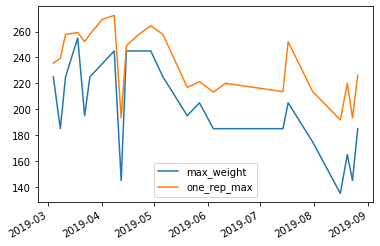

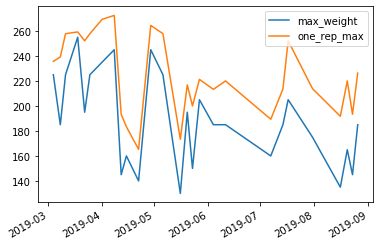

In [138]:
def plot_per_exercise_progression(workouts, exercise_name ,metric):
    """
    plot the progression of a given exercise over time
    INPUT:
        ex (str): the exercise to be plotted
        metric (list of str/str): options [max_weight, max_volume, total_volumne, one_rep_max]
    """
    timestamps = []
    if type(metric) == list:
        metrics = [[] for m in metric]
    else:
        metrics = []
        
    for workout in workouts:
        for ex_name, ex_regime in workout['workout'].items():
            if exercise_name == ex_name:
                if type(metric) == list:
                    for idx,m in enumerate(metric):
                        metrics[idx].append(get_metric((ex_name, ex_regime), m))
                else:
                    metrics.append(get_metric((ex_name, ex_regime), metric))
                timestamps.append(datetime.datetime.strptime(workout['date'], '%m/%d/%Y' ))
    
    if type(metric) == list:
        for i,_ in enumerate(metric):
            plt.plot(timestamps,metrics[i])
        plt.legend(metric)
    else:
        plt.plot(timestamps,metrics)
        plt.title(exercise_name+' '+metric+' Performance over Time')
    plt.gcf().autofmt_xdate()
    plt.show()
        
def get_metric(exercise, metric):
    """
    given an exercise, return the metric requested.
    exercise example: ('box_step_up', [(7, 162), (9, 162)])
    """
    if metric == 'max_weight':
        return max([ex_set[1] for ex_set in exercise[1]])
    if metric == 'max_volumne':
        return max([ex_set[0]*ex_set[1] for ex_set in exercise[1]])
    if metric == 'total_volumne':
        return sum([ex_set[0]*ex_set[1] for ex_set in exercise[1]])
    if metric == 'one_rep_max':
        epley_results = max([ex_set[1]*(1+ex_set[0]/30) for ex_set in exercise[1]])
        brzycki_results = max([ex_set[1]/(1.0278-0.0278*ex_set[0]) for ex_set in exercise[1]])
        return (epley_results + brzycki_results)/2
    
# exercise = 'leg_extension'
# exercise = 'bench_press'
# exercise = 'squat'
# exercise = 'pullup'
exercise = 'bench_press'
# plot_per_exercise_progression(workouts, exercise ,'max_weight')
# plot_per_exercise_progression(workouts, exercise, 'one_rep_max')
# plot_per_exercise_progression(workouts_1, exercise, 'max_volumne')
# plot_per_exercise_progression(workouts_1, exercise, 'total_volumne')
plot_per_exercise_progression(workouts, exercise, ['max_weight', 'one_rep_max'])
plot_per_exercise_progression(workouts_2, exercise, ['max_weight', 'one_rep_max'])

### Thoughts:
- case 1: `plot_per_exercise_progression(workouts, exercise, ['max_weight', 'one_rep_max'])` this is a really interesting plot to look at, throughout the 3 months period you can see I am pushing towards my limit, 1RM is increasing, but the gap between max weight and 1RM is decreasing, indicating decreasing reps, and plateauing (or fatigue)
- case 2: 

In [ ]:
def build_sda_estimator_with_exercise_name(workout):
    """
    Build a machine learning model that predicts the soreness day after
    using only the name of the exercise performed the day before
    """
    all_exercises = set([])
    for workout in workouts:
        exercise = workout['workout'].keys():
            
            

def build_sda_estimator_with_exercise_metrics:
    pass

In [ ]:
class Profile:
    """
    This inlcudes everything about one person's training progress and muscle
    development over a period of time. With the profile, a user should be able
    to figure out how strong the person is at which exercise, how much force
    can each muscle of this person produce, at what exercise regime. And with
    these slices of evidence about subject's strength, a user can extract 
    analysis such as how much has the person's strength increased over time, 
    what is the subject's most responsive group of muscle, what exercises 
    stimulates the subjects the most, etc, therefore with the aim of providing
    the most personalized training regime for the subject
    """
    def __init__():
        
    def get_strength_profile(time=None):
        """
        """
    def estimate_exercise_regime():
        pass
    def get_one_rep_max():
        pass
    def get_rep_given_weight():
        pass
    def get_weight_given_rep():
        pass

class Exercise:
    """
    An exercise contains information about how much of each muscle group does
    the exercise use. It includes information:
        name: string representation of name
        weight_type: [dumbbell, barbell, body_weight, free_weights]
        rep_regime: [(reps, weights, rest_time)]
        compound_exercise ???
    """
    def __init__():
        

class Muscle:
    """
    Muscle group include sub groups/heads.
    """
    def __init__():